In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/spaceship-titanic/neural_network_pred.csv
./kaggle/input/spaceship-titanic/best_model_pred.csv
./kaggle/input/spaceship-titanic/.DS_Store
./kaggle/input/spaceship-titanic/neural_network_gs_cv_pred_F.csv
./kaggle/input/spaceship-titanic/neural_network_gs_cv_pred_G.csv
./kaggle/input/spaceship-titanic/neural_network_pred_G.csv
./kaggle/input/spaceship-titanic/test.csv
./kaggle/input/spaceship-titanic/submission.csv
./kaggle/input/spaceship-titanic/spaceship-titanic.zip
./kaggle/input/spaceship-titanic/neural_network_gs_cv_pred.csv
./kaggle/input/spaceship-titanic/best_model_pred_G.csv
./kaggle/input/spaceship-titanic/best_model_pred_F.csv
./kaggle/input/spaceship-titanic/train.csv
./kaggle/input/spaceship-titanic/sample_submission.csv


In [2]:
# ! pip install --upgrade scikit-learn
# ! pip install h2o
# ! pip install --upgrade numpy

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import set_config
set_config(transform_output="pandas")
pd.set_option('display.max_columns', None)

/Users/dbd/opt/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_dataset = pd.read_csv('./kaggle/input/spaceship-titanic/train.csv')

X_train_dataset = train_dataset.copy().drop(columns='Transported')
y_train_dataset = train_dataset.copy()['Transported']

X_train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [5]:
X_train, X_val, y_train, y_val = train_test_split( X_train_dataset, y_train_dataset, test_size=0.3)

In [6]:
full_train_df = X_train.copy()
full_train_df['Transported'] = y_train

full_val_df = X_val.copy()
full_val_df['Transported'] = y_val

full_train_df.shape, full_val_df.shape

((6085, 14), (2608, 14))

# Drop some NaN rows from the TRAIN dataset before fitting models

DBD:  Did not improve accuracy

In [7]:
num_rows_A = full_train_df.shape[0]
round((full_train_df.isna().sum() / num_rows_A) * 100, 1)


PassengerId     0.0
HomePlanet      2.2
CryoSleep       2.5
Cabin           2.3
Destination     2.1
Age             1.9
VIP             2.3
RoomService     1.9
FoodCourt       2.0
ShoppingMall    2.4
Spa             2.1
VRDeck          2.4
Name            2.2
Transported     0.0
dtype: float64

In [8]:
#Keep zero fill columns.
drop_if_nan = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']
full_train_df_trim = full_train_df.copy().dropna(subset=drop_if_nan)
# full_train_df_trim = full_train_df.copy()

In [9]:
num_rows_A = full_train_df.shape[0]
num_rows_B = full_train_df_trim.shape[0]

num_rows_A, num_rows_B, ((num_rows_A - num_rows_B)/ num_rows_A)*100

(6085, 5553, 8.742810188989319)

In [10]:
round((full_train_df_trim.isna().sum() / num_rows_A) * 100, 1)


PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             1.8
VIP             2.0
RoomService     1.7
FoodCourt       1.8
ShoppingMall    2.2
Spa             1.9
VRDeck          2.2
Name            2.0
Transported     0.0
dtype: float64

In [11]:
# full_train_df = full_train_df_trim.copy()

# Preprocessing processing pipeline

In [12]:
class parsePassengerId(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):
        
    X_temp = X.copy()

    passenger_id_A = ''
    passenger_id_B = ''

    traveling_in_group = []
    
    for index, row in X_temp.iterrows():
        #break into parts to see what's relevant
        '''
        PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg 
        indicates a group the passenger is travelling with and pp is their number within the group. 
        People in a group are often family members, but not always.
        '''
        passenger_parts = row["PassengerId"].split('_')

        passenger_id_A = passenger_parts[0]
        passenger_id_B = passenger_parts[1]

        X_temp.at[index, 'PassengerId_A'] = passenger_id_A
        X_temp.at[index, 'PassengerId_B'] = passenger_id_B
        
        #is this person traveling in a group?
        if int(passenger_id_B) > 1:
            traveling_in_group.append(passenger_id_A)
            
    #remove duplicates
    traveling_in_group = [*set(traveling_in_group)]

    #append new feature
    X_temp['traveling_in_group'] = 0
    for group_id in traveling_in_group:
        #set feature flag
        X_temp.loc[X_temp['PassengerId_A'] == group_id, 'traveling_in_group'] = 1
    
    self.columns = X_temp.columns
    
    return X_temp

  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns

##---------------------

class parseAndImputeCabins(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):

    X_temp = X.copy()

    #parse the cabin into 3 parts
    for index, row in X_temp.iterrows():
        cabin_A = np.nan
        cabin_B = np.nan
        cabin_C = np.nan

        if (row["Cabin"] is not np.nan) and (len(row["Cabin"].split('/')) == 3):
            #break into parts to see what's relevant
            '''
            Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, 
            where side can be either P for Port or S for Starboard.
            '''
            cabin_parts = row["Cabin"].split('/')

            cabin_A = cabin_parts[0]
            cabin_B = cabin_parts[1]
            cabin_C = cabin_parts[2]
            
        X_temp.at[index, 'Cabin_A'] = cabin_A
        X_temp.at[index, 'Cabin_B'] = cabin_B
        X_temp.at[index, 'Cabin_C'] = cabin_C
    
    #impute the cabin parts
    cabin_mf_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    
    X_temp[['Cabin_A', 'Cabin_C']] = cabin_mf_imputer.fit_transform(X_temp[['Cabin_A', 'Cabin_C']])
    
    cabin_mean_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    X_temp[['Cabin_B']] = cabin_mean_imputer.fit_transform(X_temp[['Cabin_B']])
    X_temp['Cabin_B'] = X_temp['Cabin_B'].astype(int)
        
    self.columns = X_temp.columns

    return X_temp
    
  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns


##---------------------

class planetImputerEncoder(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):
    
    X_temp = X.copy()

    imputer = SimpleImputer(strategy='most_frequent')
    
    imputer = imputer.fit(X_temp[['HomePlanet']])
    X_temp['HomePlanet'] = imputer.transform(X_temp[['HomePlanet']])
    
    imputer = imputer.fit(X_temp[['Destination']])
    X_temp['Destination'] = imputer.transform(X_temp[['Destination']])
    
    self.columns = X_temp.columns
    
    return X_temp
    
  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns

##---------------------

class cryoVIPEncoder(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):
    
    X_temp = X.copy()
    
    #impute with most frequent (True/False) then convert to (1/0)
    imputer = SimpleImputer(strategy='most_frequent')

    imputer = imputer.fit(X_temp[['CryoSleep']])
    X_temp['CryoSleep'] = imputer.transform(X_temp[['CryoSleep']])
    X_temp['CryoSleep_bool'] = X_temp['CryoSleep'].map({True:1, False:0})
    
    
    imputer = imputer.fit(X_temp[['VIP']])
    X_temp['VIP'] = imputer.transform(X_temp[['VIP']])
    X_temp['VIP_bool'] = X_temp['VIP'].map({True:1, False:0})
    
    self.columns = X_temp.columns
    
    return X_temp
    
  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns

##---------------------

class TrueFalseEncoder(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def transform(self,X,y=None):

    X_temp = X.copy()
        
    for column in X.columns:
        X_temp[f'{column}_bool'] = X_temp[column].map({True:1, False:0})
        
    self.columns = X_temp.columns
    
    return X_temp

  def fit(self, X, y=None):
    self.columns = X.columns
    return self   

  def get_feature_names_out(self, arg):
    return self.columns

##---------------------

class columnDropperTransformer(BaseEstimator, TransformerMixin):

  def __init__(self,drop_columns):
    self.drop_columns = drop_columns
    self.columns = None

  def transform(self,X,y=None):
    X_temp = X.copy().drop(columns=self.drop_columns, axis=1)
    self.columns = X_temp.columns
    
    return X_temp

  def fit(self, X, y=None):
    self.columns = X.columns
    return self 

  def get_feature_names_out(self, arg):
    return self.columns

##---------------------

class oneHotEncoderWrapper(BaseEstimator, TransformerMixin):

  def __init__(self):
    self.ohe = None

  def transform(self,X,y=None):
    
    X_trans = pd.DataFrame(self.ohe.transform(X), columns=self.ohe_columns)    
    return X_trans

  def fit(self, X, y=None):
        
    # self.original_columns = X.columns
    
    if self.ohe is None:
        self.ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')        
    self.ohe = self.ohe.fit(X)

    self.ohe_columns = self.ohe.get_feature_names_out()
    return self 

  def get_feature_names_out(self, arg):
    return self.ohe_columns


##---------------------


In [13]:
verbose_pipeline = False

imputer_ct = ColumnTransformer(
    [
        ('parse_passenger_id', parsePassengerId(), ['PassengerId']),
        ('imput_zero', SimpleImputer(strategy='constant', fill_value=0), ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
        ('imp_mean', SimpleImputer(strategy='mean'), ['Age']),
        ('planet_transformer', planetImputerEncoder(), ['HomePlanet', 'Destination']),
        ('cryo_vip_transformer', cryoVIPEncoder(), ['CryoSleep', 'VIP']),
        ('parse_and_impute_cabins', parseAndImputeCabins(), ['Cabin']),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    verbose=verbose_pipeline
)

oh_ct = ColumnTransformer(
    [
        ('encoder_oh', oneHotEncoderWrapper(), ['Cabin_A', 'Cabin_C', 'HomePlanet', 'Destination']),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    verbose=verbose_pipeline,
        
)

cols_to_drop = ['Name', 'Cabin', 'CryoSleep', 'PassengerId', 'VIP']
preprocessor = Pipeline(
    [
        ('imputer_ct', imputer_ct),
        ('oh_ct', oh_ct),
        ('column_dropper', columnDropperTransformer(cols_to_drop)),
        # ('standard_scaler', StandardScaler()),
        ('robust_scaler', RobustScaler()),
    ],
    verbose=verbose_pipeline
)
preprocessor


Pipeline(steps=[('imputer_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('parse_passenger_id',
                                                  parsePassengerId(),
                                                  ['PassengerId']),
                                                 ('imput_zero',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('imp_mean', SimpleImputer(),
                                                  ['Age']),
                                                 ('planet_transformer',
                                                  planetImputerEncoder(),
                                                  ['H...
                                   verbose_feature_names_out=False)),
                ('oh_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_oh',
                                                  oneHotEncoderWrapper(),
                                                  ['Cabin_A', 'Cabin_C',
                                                   'HomePlanet',
                                                   'Destination'])],
                                   verbose_feature_names_out=False)),
                ('column_dropper',
                 columnDropperTransformer(drop_columns=['Name', 'Cabin',
                                                        'CryoSleep',
                                                        'PassengerId',
                                                        'VIP'])),
                ('robust_scaler', RobustScaler())])

In [14]:
X_train = full_train_df.copy().drop(columns='Transported')
y_train = full_train_df.copy()['Transported']

In [15]:
preprocessor.fit(X_train)

Pipeline(steps=[('imputer_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('parse_passenger_id',
                                                  parsePassengerId(),
                                                  ['PassengerId']),
                                                 ('imput_zero',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('imp_mean', SimpleImputer(),
                                                  ['Age']),
                                                 ('planet_transformer',
                                                  planetImputerEncoder(),
                                                  ['H...
                                   verbose_feature_names_out=False)),
                ('oh_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_oh',
                                                  oneHotEncoderWrapper(),
                                                  ['Cabin_A', 'Cabin_C',
                                                   'HomePlanet',
                                                   'Destination'])],
                                   verbose_feature_names_out=False)),
                ('column_dropper',
                 columnDropperTransformer(drop_columns=['Name', 'Cabin',
                                                        'CryoSleep',
                                                        'PassengerId',
                                                        'VIP'])),
                ('robust_scaler', RobustScaler())])

In [16]:
test_df = pd.read_csv('./kaggle/input/spaceship-titanic/test.csv')
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [17]:
X_train_scaled = preprocessor.transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(test_df)

# Modelling

## Baseline Model

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score
y_val_pred = lr.predict(X_val_scaled)

log_regression_val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'log_regression_val_accuracy: {round(log_regression_val_accuracy*100, 2)}')


log_regression_val_accuracy: 79.75


In [20]:
X_train_scaled.corrwith(y_train).sort_values(ascending = False)

CryoSleep_bool               0.459344
HomePlanet_Europa            0.161915
Cabin_A_B                    0.141106
Cabin_C_S                    0.115371
traveling_in_group           0.111389
Destination_55 Cancri e      0.103840
Cabin_A_C                    0.093278
PassengerId_B                0.066555
FoodCourt                    0.036969
HomePlanet_Mars              0.029031
Cabin_A_G                    0.021932
PassengerId_A                0.017131
ShoppingMall                 0.004090
Destination_PSO J318.5-22   -0.001598
Cabin_A_A                   -0.008277
Cabin_A_T                   -0.013183
Cabin_A_D                   -0.038269
Cabin_B                     -0.039875
VIP_bool                    -0.047855
Age                         -0.066874
Cabin_A_F                   -0.082313
Cabin_A_E                   -0.090248
Destination_TRAPPIST-1e     -0.090532
Cabin_C_P                   -0.115371
HomePlanet_Earth            -0.163181
VRDeck                      -0.205734
Spa         

## AutoML


In [21]:
do_automl = True

if do_automl:
    import h2o
    from h2o.automl import H2OAutoML

    h2o.init()
    
    aml = H2OAutoML(max_models=10,
                    balance_classes=False)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /Users/dbd/opt/miniconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qp/5z2vy03j04s0yht5rwlccksw0000gn/T/tmp2gzipcn_
  JVM stdout: /var/folders/qp/5z2vy03j04s0yht5rwlccksw0000gn/T/tmp2gzipcn_/h2o_dbd_started_from_python.out
  JVM stderr: /var/folders/qp/5z2vy03j04s0yht5rwlccksw0000gn/T/tmp2gzipcn_/h2o_dbd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Belgrade
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_dbd_b2xmk8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [22]:
if do_automl:

    X_train_scaled_with_target = X_train_scaled.copy()
    X_train_scaled_with_target['Transported'] = y_train
    h2o_train = h2o.H2OFrame(X_train_scaled_with_target)

    X_val_scaled_with_target = X_val_scaled.copy()
    X_val_scaled_with_target['Transported'] = y_val
    h2o_val = h2o.H2OFrame(X_val_scaled_with_target)
    
    aml.train(training_frame=h2o_train, y='Transported', validation_frame=h2o_val)
    
    lb = aml.leaderboard
    lb.head(rows=lb.nrows)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:25:54.458: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


In [23]:
if do_automl:
    best_model_1 = aml.get_best_model()
type(best_model_1)

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [24]:
if do_automl:
    # h2o_val = h2o.H2OFrame(full_val)
    model_performance = best_model_1.model_performance(h2o_val)
    print(model_performance)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.12541371368192156
RMSE: 0.35413798678187797
LogLoss: 0.3867912397939736
AUC: 0.9023510626097236
AUCPR: 0.9099823311965867
Gini: 0.8047021252194473
Null degrees of freedom: 2607
Residual degrees of freedom: 2603
Null deviance: 3616.5792999853084
Residual deviance: 2017.503106765366
AIC: 2027.503106765366

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4430908781421015
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  1008     307     0.2335   (307.0/1315.0)
True   183      1110    0.1415   (183.0/1293.0)
Total  1191     1417    0.1879   (490.0/2608.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.443091     0.819188  214
max f2                       0.205309     0.8787    291
max f0point5           

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230130_172554,0.999968,0.132092,0.99997,0.00230119,0.162386,0.0263691,1257,0.0183,DRF
GBM_4_AutoML_1_20230130_172554,0.980844,0.235835,0.98221,0.0764865,0.257284,0.0661949,728,0.017269,GBM
XRT_1_AutoML_1_20230130_172554,0.969324,0.354069,0.970052,0.109041,0.316129,0.0999379,895,0.009684,DRF
XGBoost_2_AutoML_1_20230130_172554,0.965941,0.25727,0.968759,0.104694,0.278677,0.0776609,817,0.007266,XGBoost
GBM_3_AutoML_1_20230130_172554,0.964989,0.27936,0.968454,0.110303,0.287617,0.0827236,655,0.013948,GBM
GBM_2_AutoML_1_20230130_172554,0.958194,0.291763,0.961893,0.1265,0.29728,0.0883752,643,0.017996,GBM
XGBoost_1_AutoML_1_20230130_172554,0.954379,0.286014,0.959164,0.119729,0.29649,0.0879061,966,0.005607,XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20230130_172554,0.949626,0.301174,0.955863,0.132458,0.306795,0.094123,4092,0.02963,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230130_172554,0.946042,0.307681,0.952936,0.133596,0.311041,0.0967466,4901,0.026374,StackedEnsemble
XGBoost_3_AutoML_1_20230130_172554,0.945284,0.309887,0.951033,0.134899,0.311249,0.0968759,824,0.005456,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230130_172554

,False,True,Error,Rate
False,2637.0,363.0,0.121,(363.0/3000.0)
True,451.0,2634.0,0.1462,(451.0/3085.0)
Total,3088.0,2997.0,0.1338,(814.0/6085.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

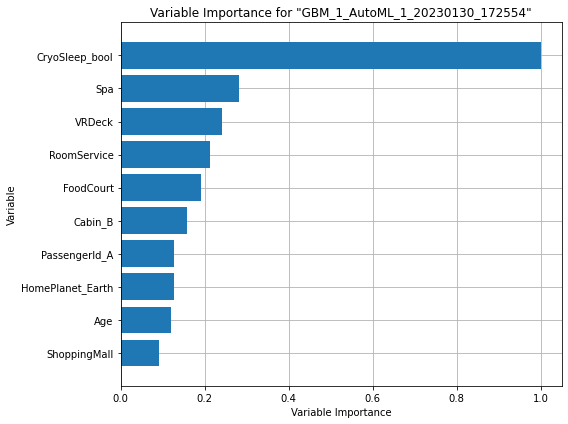

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

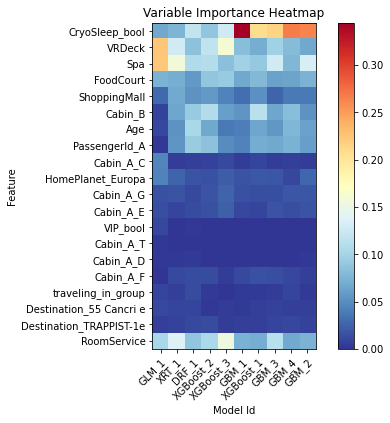

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

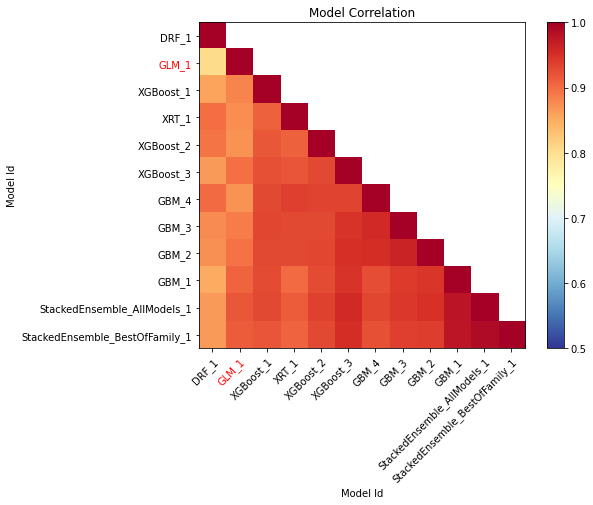

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

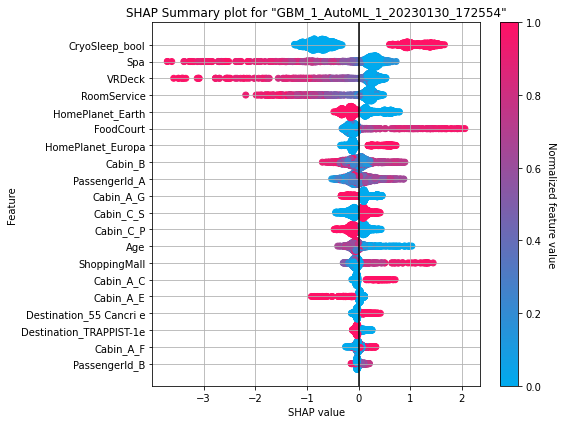

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

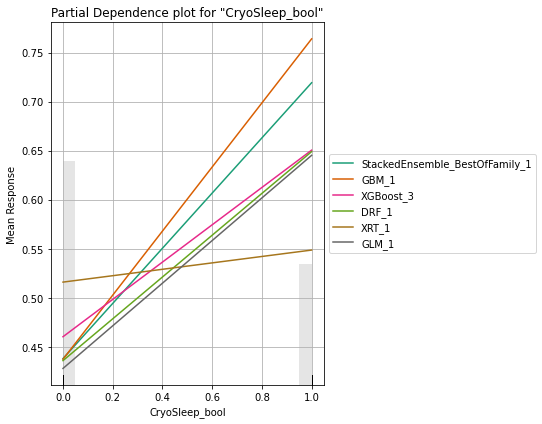

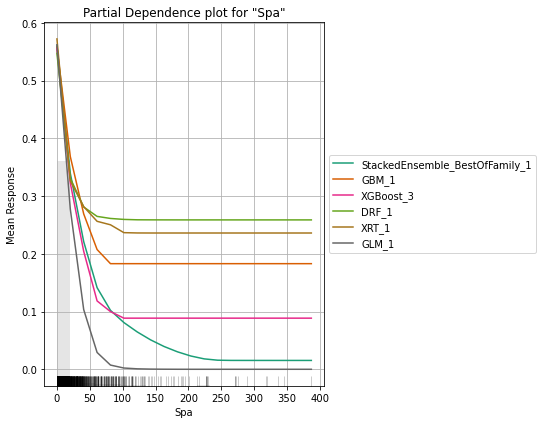

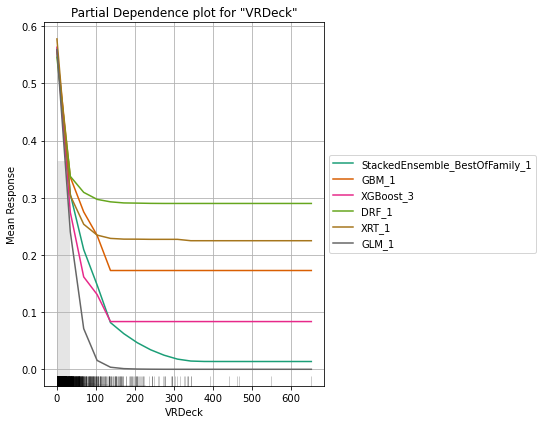

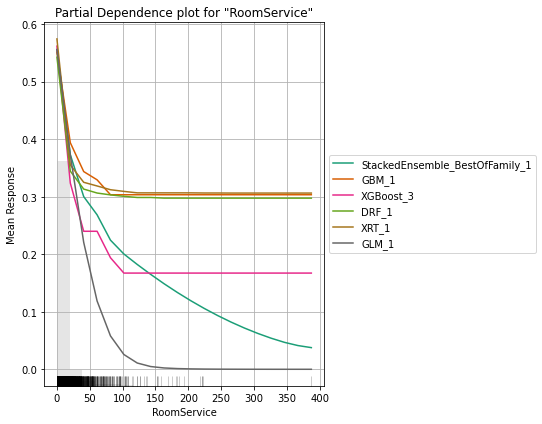

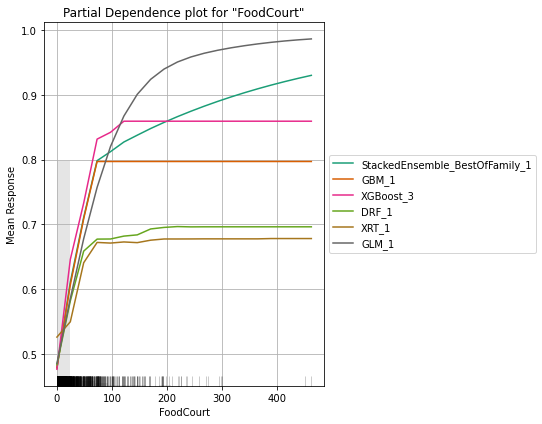

In [25]:
if do_automl:
    explain_model = aml.explain(frame = h2o_train, figsize = (8,6))

In [26]:
if do_automl:
        
    # y_pred_best_model
    y_val_pred_auto_ml = best_model_1.predict(h2o_val)

    y_val_pred_auto_ml_accuracy = accuracy_score(y_val, y_val_pred_auto_ml['predict'].as_data_frame())
    print(f'y_val_pred_auto_ml_accuracy: {round(y_val_pred_auto_ml_accuracy*100, 2)}')

    y_pred_best_model = best_model_1.predict(h2o.H2OFrame(X_test_scaled))

    y_pred_best_model_df = y_pred_best_model.as_data_frame()
    y_pred_best_model_df = y_pred_best_model_df.drop(columns=['False', 'True'])
    y_pred_best_model_df.columns = ['Transported']
    y_pred_best_model_df['PassengerId'] = test_df['PassengerId']
    y_pred_best_model_df.to_csv('./kaggle/input/spaceship-titanic/best_model_pred_G.csv', index=0)
    
    y_pred_best_model_df

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
y_val_pred_auto_ml_accuracy: 81.21
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


## Neural Network #1

In [27]:
def plot_loss(history, metric='acc'):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history[f'{metric}'])
    ax2.plot(history.history[f'val_{metric}'])
    ax2.set_title(f'{metric}')
    ax2.set_ylabel(f'{metric}')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import cast

def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(40, activation='relu', input_dim=X_train_scaled.shape[-1]))
    model.add(layers.Dropout(.1))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(.1))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(.1))
    model.add(layers.Dense(1, activation='sigmoid'))
       
    return model

def compile_model(model, name):
    
    model.compile(loss='binary_crossentropy',
                 optimizer=name,
                 metrics=['acc'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

best_test_accuracy = None
best_model = None
optimizers = ['adam']#, 'sgd', 'adadelta', 'adagrad', 'rmsprop']

y_train_tensor = tf.cast(y_train , dtype=tf.int8)
y_val_tensor = tf.cast(y_val , dtype=tf.int8)

for optimizer in optimizers:
    model = initialize_model()

    # optimizer = 'adam'
    compile_model(model, optimizer)

    #optimize for validation accuracy
    es = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_acc')

    history = model.fit(X_train_scaled, 
                        y_train_tensor,
                        validation_data=(X_val_scaled, y_val_tensor),
                        epochs=500,
                        batch_size=8,
                        callbacks = [es],
                        verbose=0, 
                    
                       )
        
    test_accuracy = model.evaluate(X_val_scaled, y_val_tensor)[1]
    if (best_test_accuracy is None) or (best_test_accuracy < test_accuracy):
        best_test_accuracy = test_accuracy
        best_model = model

    print(f'{optimizer}:: train_accuracy: {np.mean(history.history["acc"])}, val_accuracy: {np.mean(history.history["val_acc"])}, test_accuracy: {test_accuracy}')



2023-01-30 17:27:17.181237: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


82/82 [==============================] - 0s 393us/step - loss: 0.4187 - acc: 0.8060
adam:: train_accuracy: 0.7866533654076713, val_accuracy: 0.7988606350762504, test_accuracy: 0.8059815764427185


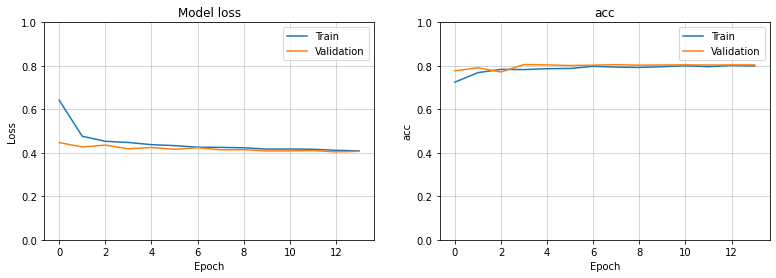

In [30]:
plot_loss(history)

In [31]:
y_pred_best_model = best_model.predict(X_test_scaled)
y_pred_best_model = ['True' if x>.6 else 'False' for x in y_pred_best_model]

y_pred_best_model_df = pd.DataFrame({'Transported':y_pred_best_model, 'PassengerId':test_df['PassengerId']})

y_pred_best_model_df.to_csv('./kaggle/input/spaceship-titanic/neural_network_pred_G.csv', index=0)

# y_pred_best_model_df.value_counts()

134/134 [==============================] - 0s 409us/step


## Neural Network #2

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu',input_dim=X_train_scaled.shape[-1]))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    
    classifier.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])
    return classifier

In [33]:
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(build_fn = build_classifier)

param_grid = dict(optimizer = ['Adam'],
                  epochs=[10,100,500],
                  batch_size=[8,16,32])

grid = GridSearchCV(estimator=classifier, 
                    param_grid=param_grid, 
                    scoring='accuracy', 
                    verbose=0)

early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='accuracy')
grid_result = grid.fit(X_train_scaled, y_train, callbacks=[early_stopping], verbose=0)

/var/folders/qp/5z2vy03j04s0yht5rwlccksw0000gn/T/ipykernel_70090/45442759.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


39/39 [==============================] - 0s 406us/step


In [34]:
best_parameters = grid.best_params_
best_accuracy = grid.best_score_
best_accuracy, best_parameters

(0.8, {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adam'})

In [35]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800000 using {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adam'}
0.798850 (0.007038) with: {'batch_size': 8, 'epochs': 10, 'optimizer': 'Adam'}
0.789647 (0.011930) with: {'batch_size': 8, 'epochs': 100, 'optimizer': 'Adam'}
0.790468 (0.008835) with: {'batch_size': 8, 'epochs': 500, 'optimizer': 'Adam'}
0.795563 (0.007698) with: {'batch_size': 16, 'epochs': 10, 'optimizer': 'Adam'}
0.783566 (0.006647) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'Adam'}
0.780608 (0.009540) with: {'batch_size': 16, 'epochs': 500, 'optimizer': 'Adam'}
0.800000 (0.004144) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adam'}
0.792276 (0.009644) with: {'batch_size': 32, 'epochs': 100, 'optimizer': 'Adam'}
0.790140 (0.010218) with: {'batch_size': 32, 'epochs': 500, 'optimizer': 'Adam'}


In [36]:
classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer=best_parameters['optimizer'],
                             batch_size=best_parameters['batch_size'],
                             epochs=best_parameters['epochs'])

classifier.fit(X_train_scaled, y_train, verbose=0)

/var/folders/qp/5z2vy03j04s0yht5rwlccksw0000gn/T/ipykernel_70090/1488520684.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier,


In [37]:
# y_pred_best_model
y_pred_neural_network_gs_cv_pred = classifier.predict(X_val_scaled)

neuralnet_val_accuracy = accuracy_score(y_val, y_pred_neural_network_gs_cv_pred)
print(f'neuralnet_val_accuracy: {round(neuralnet_val_accuracy*100, 2)}')

82/82 [==============================] - 0s 369us/step
neuralnet_val_accuracy: 80.71


In [38]:
y_test_neural_network_gs_cv_pred = classifier.predict(X_test_scaled)
y_test_neural_network_gs_cv_pred = [x[0] for x in y_test_neural_network_gs_cv_pred]

y_pred_best_model_df = pd.DataFrame({'Transported':y_test_neural_network_gs_cv_pred, 'PassengerId':test_df['PassengerId']})
y_pred_best_model_df['Transported'].value_counts()

y_pred_best_model_df.to_csv('./kaggle/input/spaceship-titanic/neural_network_gs_cv_pred_G.csv', index=0)

134/134 [==============================] - 0s 280us/step
